In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import * 


Bad key "text.kerning_factor" on line 4 in
/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [6]:
L=1025  # system size 2**n+1
N=10000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.33, 0.37, 0.001) 
n = int(np.floor(np.log2(L)) - 1)

edge_reach_frac = [] 
all_edge_reach_frac = [] 
ts = [] 
mean_msds = [] 
actives = [] 
passives = [] 

for h in hs:
    filename = 'data/data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
    print(filename)
    file = open(filename)
    realisations, moments = read_file(file, verbose=False) 
    
    times = [] 
    msds = [] 
    tot_edge_reach = 0 
    tot_possible_edge = len(realisations)*4 
    all_edge_reach = 0 

    for (i, realisation) in enumerate(realisations):

        time, msd, edge_reach, coarse_grain_moments = extract_lite(realisation, n)
        times.append(time)
        msds.append(msd)
        tot_edge_reach += np.sum(edge_reach>0)
        all_edge_reach += int(np.sum(edge_reach>0) == 4)
        
    edge_reach_frac.append(tot_edge_reach/tot_possible_edge)
    all_edge_reach_frac.append(all_edge_reach/len(realisations))
    t = select_longest(times)
    mean_msd = np.mean(pad(msds), axis=0)
    
    ts.append(t) 
    mean_msds.append(mean_msd)
    
    active_moments, tracer_moments = extract_moments(moments)
    
    actives.append(active_moments)
    passives.append(tracer_moments)

data/data_L1025_N10000_p0.34_q0.33_h0.330.dat
data/data_L1025_N10000_p0.34_q0.33_h0.331.dat
data/data_L1025_N10000_p0.34_q0.33_h0.332.dat
data/data_L1025_N10000_p0.34_q0.33_h0.333.dat
data/data_L1025_N10000_p0.34_q0.33_h0.334.dat
data/data_L1025_N10000_p0.34_q0.33_h0.335.dat
data/data_L1025_N10000_p0.34_q0.33_h0.336.dat
data/data_L1025_N10000_p0.34_q0.33_h0.337.dat
data/data_L1025_N10000_p0.34_q0.33_h0.338.dat
data/data_L1025_N10000_p0.34_q0.33_h0.339.dat
data/data_L1025_N10000_p0.34_q0.33_h0.340.dat
data/data_L1025_N10000_p0.34_q0.33_h0.341.dat
data/data_L1025_N10000_p0.34_q0.33_h0.342.dat
data/data_L1025_N10000_p0.34_q0.33_h0.343.dat
data/data_L1025_N10000_p0.34_q0.33_h0.344.dat
data/data_L1025_N10000_p0.34_q0.33_h0.345.dat
data/data_L1025_N10000_p0.34_q0.33_h0.346.dat
data/data_L1025_N10000_p0.34_q0.33_h0.347.dat
data/data_L1025_N10000_p0.34_q0.33_h0.348.dat
data/data_L1025_N10000_p0.34_q0.33_h0.349.dat
data/data_L1025_N10000_p0.34_q0.33_h0.350.dat
data/data_L1025_N10000_p0.34_q0.33

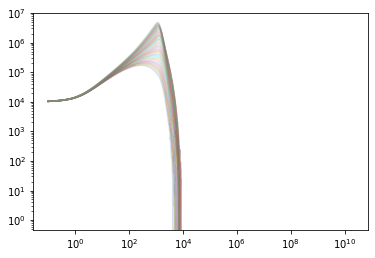

In [7]:
for (i, active_moments) in enumerate(actives): 
    t = active_moments[:, 0]
    m = active_moments[:, 2]

    plt.plot(t, m, alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

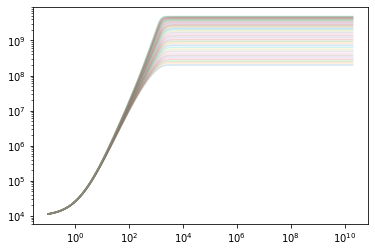

In [8]:
for (i, tracer_moments) in enumerate(passives): 
    t = tracer_moments[:, 0]
    m = tracer_moments[:, 2]

    plt.plot(t, m, alpha=0.2)
plt.yscale('log')
plt.xscale('log')
plt.show() 

/Users/yutingli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


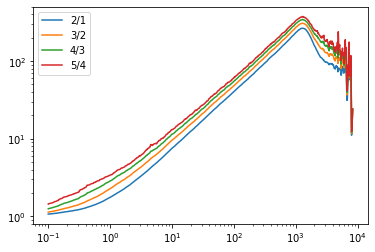

In [9]:
active_moments = actives[20]
t = active_moments[:, 0]
for i in range(3, 7): 
    m = active_moments[:, i]/active_moments[:, i-1]
    plt.plot(t, m, label='{}/{}'.format(i-1, i-2))
plt.legend() 
plt.yscale('log')
plt.xscale('log')
plt.show() 

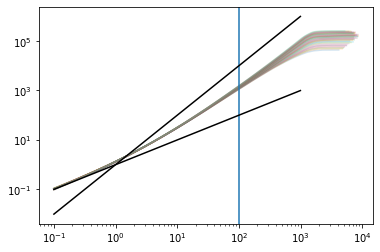

In [10]:
for (t, m) in zip(ts, mean_msds): 
    if len(t[:-1]) == len(m):
        plt.plot(t[:-1], m, alpha=0.2)
plt.axvline(x=1e2)

x = np.array(t)
x = x[x<1e3] 
plt.plot(x, x**2, color='k')
plt.plot(x, x, color='k')
plt.xscale('log')
plt.yscale('log')
plt.show() 

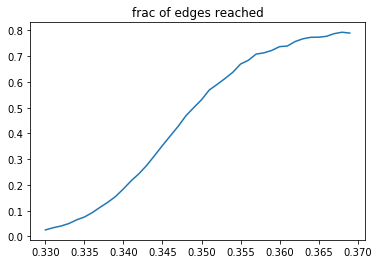

In [11]:
plt.plot(hs, edge_reach_frac)
plt.title('frac of edges reached')
plt.show() 

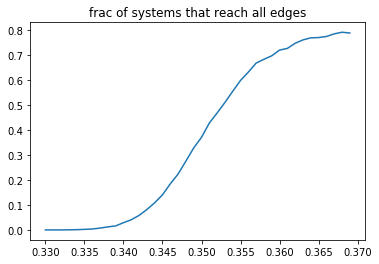

In [12]:
plt.plot(hs, all_edge_reach_frac)
plt.title('frac of systems that reach all edges')
plt.show() 

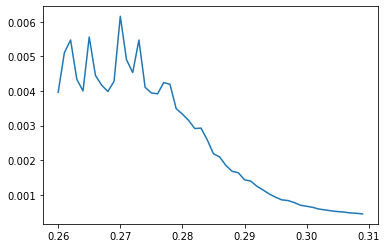

In [12]:
binder = []  
for (i,h) in enumerate(hs):
    m4 = passives[i][-1, 5] # moment at t infinity
    m2 = passives[i][-1, 3]
    binder.append(m4/(m2**2))
    
plt.plot(hs,binder)
plt.show() 

In [2]:
L=2049  # system size 2**n+1
Ls = [257, 513, 1025]
N=10000 # number of realisations

p=0.34 # prob. of hopping in the same direction as the previous hop 
q=0.33

hs = np.arange(0.33, 0.37, 0.001)
n = int(np.floor(np.log2(L)) - 1)
binders = [] 

for L in Ls: 
    binder = [] 
    for h in hs:
        print(h)
        filename = 'data/data_L{}_N{}_p{}_q{}_h{:.3f}.dat'.format(L, N, p, q, h)
        file = open(filename)
        _, moments = read_file(file, verbose=False) 
        
        active_moments, tracer_moments = extract_moments(moments)
    
        m4 = tracer_moments[-1, 5] # moment at t infinity
        m2 = tracer_moments[-1, 3]
        binder.append(m4/(m2**2))
    
    binders.append(binder)
        
        

0.33
0.331
0.332
0.333
0.334
0.335
0.336
0.337
0.338
0.339
0.34
0.341
0.342
0.343
0.34400000000000003
0.34500000000000003
0.34600000000000003
0.34700000000000003
0.34800000000000003
0.34900000000000003
0.35000000000000003
0.35100000000000003
0.35200000000000004
0.35300000000000004
0.35400000000000004
0.35500000000000004
0.35600000000000004
0.35700000000000004
0.35800000000000004
0.35900000000000004
0.36000000000000004
0.36100000000000004
0.36200000000000004
0.36300000000000004
0.36400000000000005
0.36500000000000005
0.36600000000000005
0.36700000000000005
0.36800000000000005
0.36900000000000005
0.33
0.331
0.332
0.333
0.334
0.335
0.336
0.337
0.338
0.339
0.34
0.341
0.342
0.343
0.34400000000000003
0.34500000000000003
0.34600000000000003
0.34700000000000003
0.34800000000000003
0.34900000000000003
0.35000000000000003
0.35100000000000003
0.35200000000000004
0.35300000000000004
0.35400000000000004
0.35500000000000004
0.35600000000000004
0.35700000000000004
0.35800000000000004
0.35900000000000

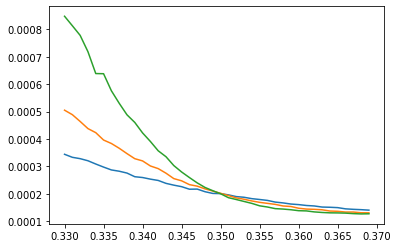

In [3]:
for b in binders: 
    plt.plot(hs, b)
plt.show() 

In [7]:
np.save('binders.npy', binders)

In [8]:
binders = np.load('binders.npy') 
Ls = np.array([257, 513, 1025])

ValueError: x and y must have same first dimension, but have shapes (3,) and (40, 3)

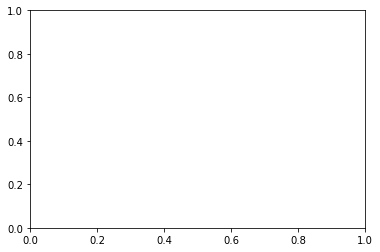

In [10]:
plt.plot(binders.T)
plt.show() 

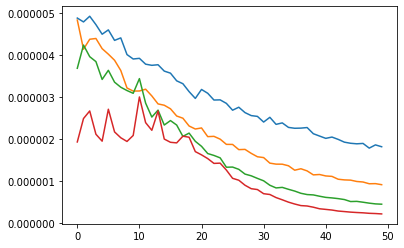

In [15]:
plt.plot(binders.T/(Ls))
plt.show() 